# Problem Statement
Given the following data set, use the sklearn package to find the co-efficients of the
line that describes the following relationships:
1) x1 and y
2) x2 and y
3) x3 and y
Also, plot the line and the data using matplotlib and report the co-efficient of
determination for the lines using the metrics library.

In [14]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression

# this allows plots to appear directly in the notebook
%matplotlib inline


In [15]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head(15)
data.columns = ['TV ADD costin Thousand Dollar(x1)', 'Radio ADD costin Thousand Dollar(x2)', 'NewsPaper ADD costin Thousand Dollar(x3)', 'Sales of product in Thousand Dollar(x1)']

In [16]:
data.head(15)

,TV ADD costin Thousand Dollar(x1),Radio ADD costin Thousand Dollar(x2),NewsPaper ADD costin Thousand Dollar(x3),Sales of product in Thousand Dollar(x1)
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


Find model with individual features

In [17]:
lm = LinearRegression()
# create X and y
feature_cols = ['TV ADD costin Thousand Dollar(x1)']
X = data[feature_cols]
y = data['Sales of product in Thousand Dollar(x1)']
lm.fit(X, y)

# print intercept and coefficients
print("Estimated intercept coefficient",lm.intercept_)
print("coefficient length",len(lm.coef_))
print("coefficient",lm.coef_)

mseTVADD = np.mean((y - lm.predict(X))**2)
print (mseTVADD)
TV_new = pd.DataFrame({'TV ADD costin Thousand Dollar(x1)': [data[feature_cols].min(), data[feature_cols].max()]})
TV_preds = lm.predict(TV_new)

Estimated intercept coefficient 7.032593549127693
coefficient length 1
coefficient [0.04753664]
10.512652915656753


In [18]:
lm = LinearRegression()
# create X and y
feature_cols = ['Radio ADD costin Thousand Dollar(x2)']
X = data[feature_cols]
y = data['Sales of product in Thousand Dollar(x1)']
lm.fit(X, y)

# print intercept and coefficients
print("Estimated intercept coefficient",lm.intercept_)
print("coefficient length",len(lm.coef_))
print("coefficient",lm.coef_)

mseRADIOADD = np.mean((y - lm.predict(X))**2)
print (mseRADIOADD)

Radio_new = pd.DataFrame({'Radio ADD costin Thousand Dollar(x2)': [data[feature_cols].min(), data[feature_cols].max()]})
Radio_preds = lm.predict(Radio_new)

Estimated intercept coefficient 9.311638095158283
coefficient length 1
coefficient [0.20249578]
18.09239774512543


In [19]:
lm = LinearRegression()
# create X and y
feature_cols = ['NewsPaper ADD costin Thousand Dollar(x3)']
X = data[feature_cols]
y = data['Sales of product in Thousand Dollar(x1)']
lm.fit(X, y)

# print intercept and coefficients
print("Estimated intercept coefficient",lm.intercept_)
print("coefficient length",len(lm.coef_))
print("coefficient",lm.coef_)

mseNewsPaperAdd = np.mean((y - lm.predict(X))**2)
print (mseNewsPaperAdd)

NewsPaper_new = pd.DataFrame({'NewsPaper ADD costin Thousand Dollar(x3)': [data[feature_cols].min(), data[feature_cols].max()]})
NewsPaper_preds = lm.predict(NewsPaper_new)

Estimated intercept coefficient 12.35140706927816
coefficient length 1
coefficient [0.0546931]
25.6740227205597


Find sales with multiple features

In [20]:
x=data.drop('Sales of product in Thousand Dollar(x1)',axis = 1)
y= data['Sales of product in Thousand Dollar(x1)']
lm = LinearRegression()
lm.fit(x, y)
# construct a data frame that contains features and estimated coefficients.
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns = ['Features', 'EstimatedCoefficients'])
lm.predict(x)
data['PredictedSales'] = lm.predict(x)
data.head()

,TV ADD costin Thousand Dollar(x1),Radio ADD costin Thousand Dollar(x2),NewsPaper ADD costin Thousand Dollar(x3),Sales of product in Thousand Dollar(x1),PredictedSales
1,230.1,37.8,69.2,22.1,20.523974
2,44.5,39.3,45.1,10.4,12.337855
3,17.2,45.9,69.3,9.3,12.307671
4,151.5,41.3,58.5,18.5,17.597830
5,180.8,10.8,58.4,12.9,13.188672


In [21]:
msePTRATIO = np.mean((data['Sales of product in Thousand Dollar(x1)'] - lm.predict(x))**2)
msePTRATIO

2.7841263145109343

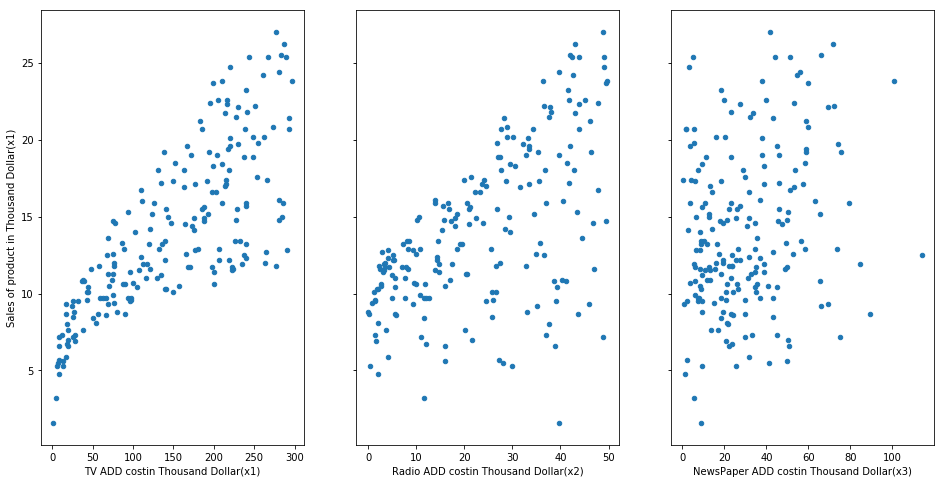

In [24]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV ADD costin Thousand Dollar(x1)', y='Sales of product in Thousand Dollar(x1)', ax=axs[0], figsize=(16, 8))

# data.plot(TV_new, TV_preds, c='red', linewidth=2)
data.plot(kind='scatter', x='Radio ADD costin Thousand Dollar(x2)', y='Sales of product in Thousand Dollar(x1)', ax=axs[1])
# data.plot(Radio_new, Radio_preds, c='red', linewidth=2)
data.plot(kind='scatter', x='NewsPaper ADD costin Thousand Dollar(x3)', y='Sales of product in Thousand Dollar(x1)', ax=axs[2])

# then, plot the least squares line
# data.plot(NewsPaper_new, NewsPaper_preds, c='red', linewidth=2)